# 5-2 以少量資料集從頭訓練一個卷積神經網路

### 程式 5.4 複製圖片到訓練、驗證和測試集目錄

### **Download Dataset**

In [1]:
# 將資料集 .zip 下載到 tmp
import tensorflow as tf
import numpy as np

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-11-08 09:17:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 64.233.170.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.9MB/s    in 3.9s    

2025-11-08 09:17:37 (16.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

# 將資料集解壓縮至/tmp
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir = r'/tmp/cats_and_dogs_filtered'
# 用來儲存少量資料集的目錄位置
base_dir = r'/tmp/cats_and_dogs_small'
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir) # 用來訓練貓圖片的目錄位置

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir) # 用來訓練狗圖片的目錄位置

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir) # 用來驗證貓圖片的目錄位置

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir) # 用來驗證狗圖片的目錄位置

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir) # 用來測試貓圖片的目錄位置

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir) # 用來測試狗圖片的目錄位置




# 複製前面 1000 張貓圖片到 train_cats_dir 訓練目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', 'cats', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 250 張貓圖片到 validation_cats_dir 驗證目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 2250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'validation', 'cats', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 250 張貓圖片到 test_cats_dir 測試目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(2250, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'validation', 'cats', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製前面 1000 張狗圖片到 train_dogs_dir 訓練目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', 'dogs', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 250 張狗圖片到 validation_dogs_dir 驗證目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 2250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'validation', 'dogs', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 250 張狗圖片到 test_dogs_dir 測試目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(2250, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'validation', 'dogs', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


### 我們計算每個訓練/驗證/測試分組中的圖片數量，做為資料完整性的檢查：

In [4]:
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))
print('測試用的貓照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的狗照片張數:', len(os.listdir(test_dogs_dir)))

訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
驗證用的貓照片張數: 250
驗證用的狗照片張數: 250
測試用的貓照片張數: 250
測試用的狗照片張數: 250


### 程式 5.5 為狗 vs. 貓分類實作的一個小型的卷積神經網路

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()  # 查看模型摘要

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

### 程式 5.6 配置 model 以進行訓練

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 程式 5.7 使用 ImageDataGenerator 產生器從目錄中讀取影像

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 看看產生器的輸出結果

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 程式 5.8 調整 model 以使用批次量產生器

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - acc: 0.5111 - loss: 0.6954 - val_acc: 0.6120 - val_loss: 0.6835
Epoch 2/30
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.6167 - loss: 0.6831

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - acc: 0.5833 - loss: 0.6765 - val_acc: 0.6460 - val_loss: 0.6472
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - acc: 0.6441 - loss: 0.6421 - val_acc: 0.7020 - val_loss: 0.6191
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.6515 - loss: 0.6271 - val_acc: 0.6120 - val_loss: 0.6170
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - acc: 0.6815 - loss: 0.5901 - val_acc: 0.6660 - val_loss: 0.6157
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.7306 - loss: 0.5316 - val_acc: 0.7140 - val_loss: 0.5510
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.7410 - loss: 0.5349 - val_acc: 0.7360 - val_loss: 0.5328
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - acc: 0.7425 - loss: 0.5164 - val_acc: 0.7400 - val_loss: 0.5080
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - acc: 0.7802 - loss: 0.4714 - val_acc: 0.7340 - val_loss: 0.5193
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc

### 程式 5.9 儲存model

In [10]:
model.save('cats_and_dogs_small_1.h5')

### 程式 5.10 顯示訓練和驗證週期的損失值和準確度曲線

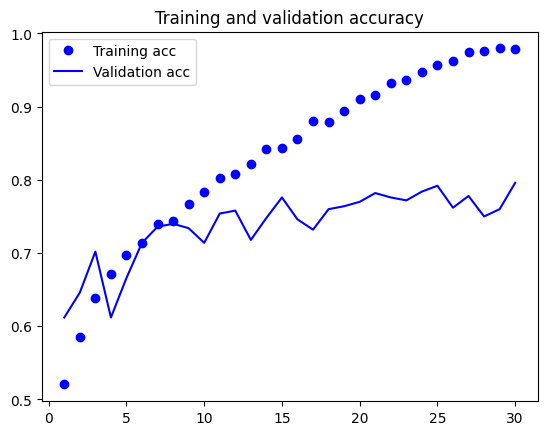

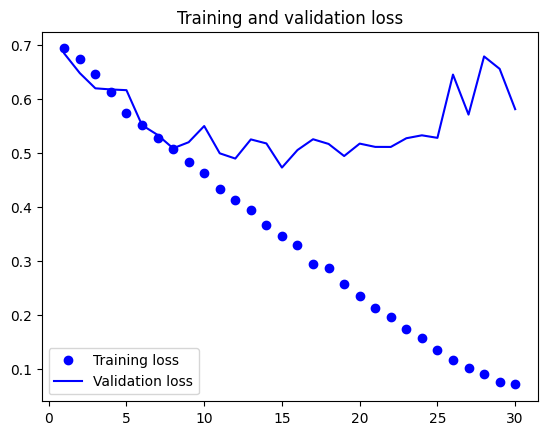

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.11 透過 ImageDataGenerator 設定資料擴增

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

### 程式 5.12 顯示一些隨機擴充的訓練影像

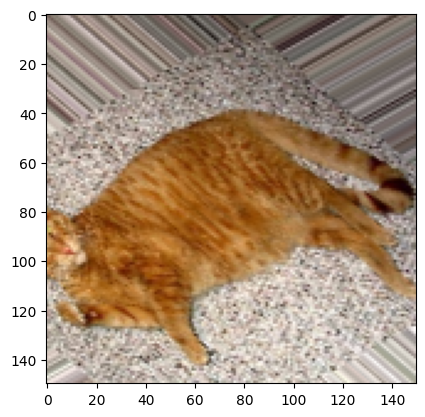

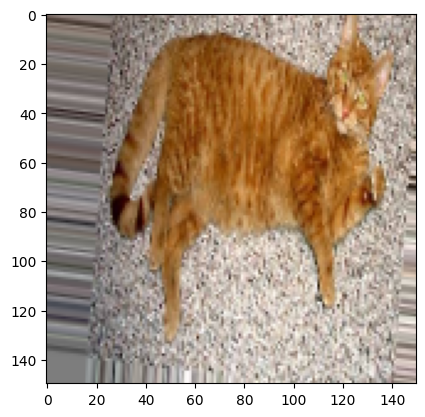

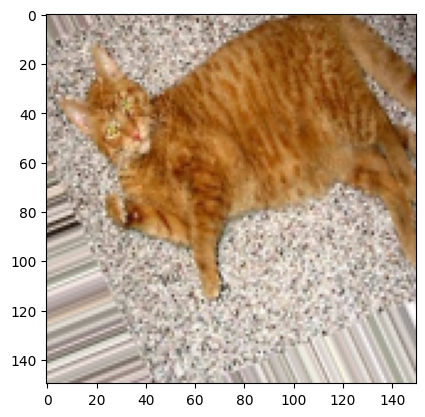

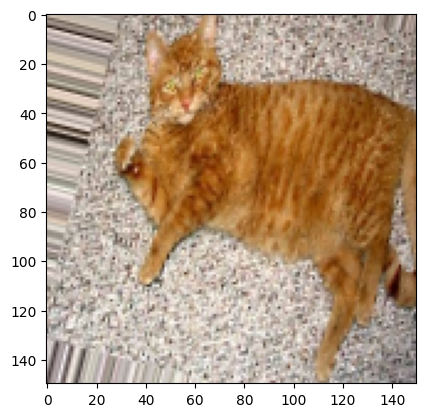

In [13]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 程式 5.13 定義具有 Dropout 層的新卷積神經網路

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 程式 5.14 使用資料擴增產生器來訓練卷積神經網路

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
        train_dir,    # 目標目錄
        target_size=(150, 150), # 所有圖像大小調整成 150×150
        batch_size=32,
        class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# 訓練
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
 63/100 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - acc: 0.5085 - loss: 0.6948

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step - acc: 0.5078 - loss: 0.6948 - val_acc: 0.5000 - val_loss: 0.6908
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - acc: 0.5147 - loss: 0.6919 - val_acc: 0.5160 - val_loss: 0.6843
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - acc: 0.5469 - loss: 0.6869 - val_acc: 0.6100 - val_loss: 0.6785
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - acc: 0.5711 - loss: 0.6815 - val_acc: 0.5720 - val_loss: 0.6760
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - acc: 0.5886 - loss: 0.6753 - val_acc: 0.5620 - val_loss: 0.6695
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - acc: 0.5736 - loss: 0.6728 - val_acc: 0.6600 - val_loss: 0.6431
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - acc: 0.5904 - loss: 0.6678 - val_acc: 0.6460 - val_loss: 0.6381
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - acc: 0.6089 - loss: 0.6611 - val_acc: 0.6540 - val_loss: 0.6327
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

### 程式 5.15 儲存 model

In [18]:
model.save('cats_and_dogs_small_2.h5')

### 再次顯示訓練和驗證週期的損失值和準確度曲線

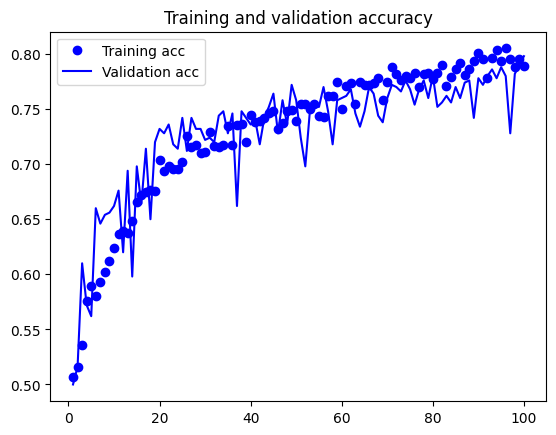

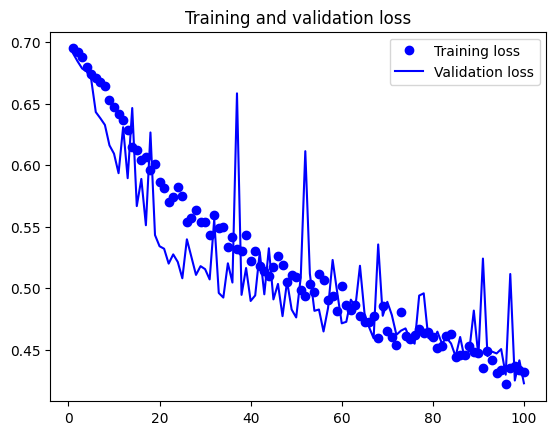

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()